In [175]:
%matplotlib inline

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


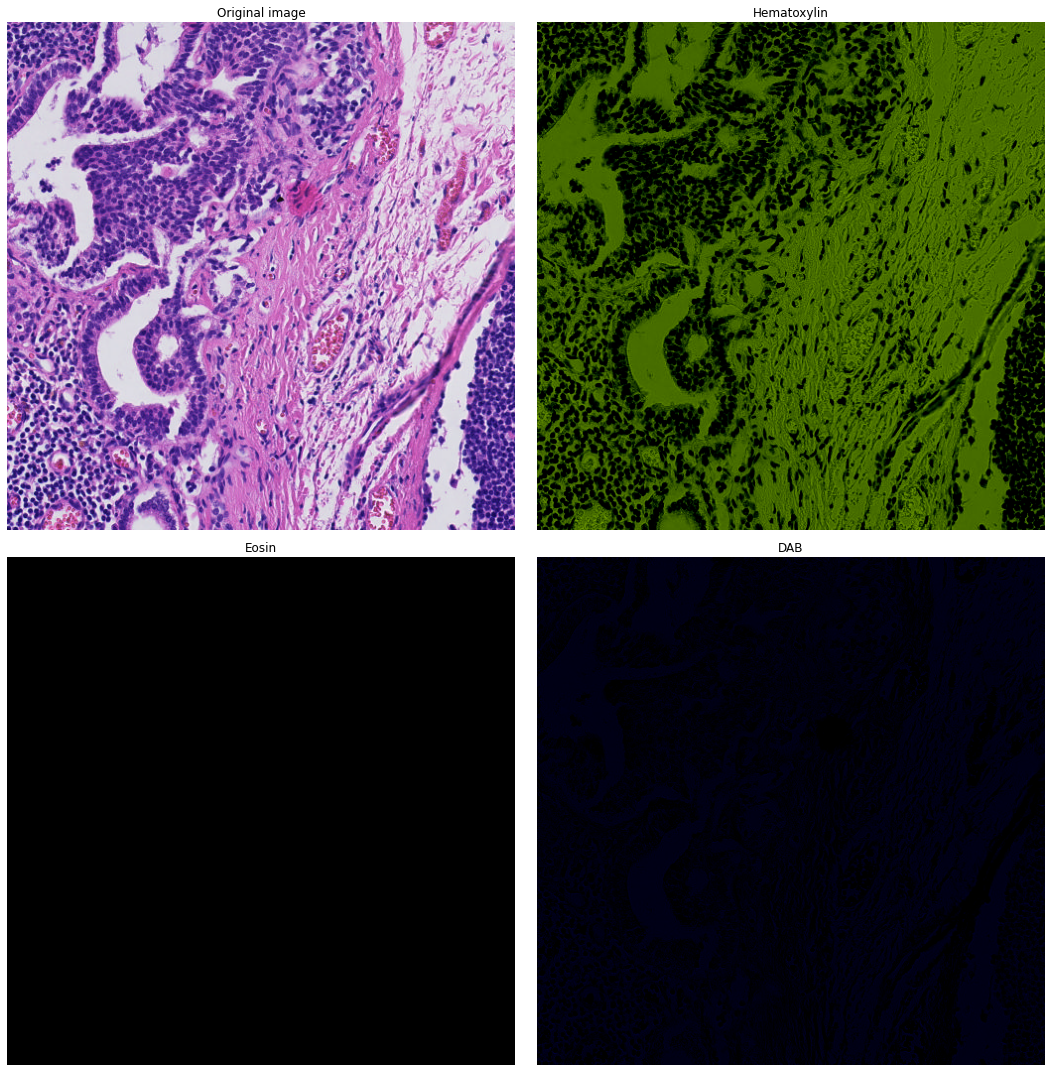

In [176]:
import numpy as np
import matplotlib.pyplot as plt

import skimage.io as io
from skimage import data
from skimage.color import rgb2hed, hed2rgb

# Example IHC image
# "dataset045/有癌细胞/01_16_22.png"
# "dataset045/无癌细胞/01_18_35.png"
ihc_rgb = skimage.io.imread("dataset045/有癌细胞/01_17_22.png")

# Separate the stains from the IHC image
# RGB to Haematoxylin-Eosin-DAB (HED) color space conversion.
ihc_hed = rgb2hed(ihc_rgb)

# Create an RGB image for each of the stains
null = np.zeros_like(ihc_hed[:, :, 0])
ihc_h = hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1))
ihc_e = hed2rgb(np.stack((null, ihc_hed[:, :, 1], null), axis=-1))
ihc_d = hed2rgb(np.stack((null, null, ihc_hed[:, :, 2]), axis=-1))

# Display
fig, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(ihc_rgb)
ax[0].set_title("Original image")

ax[1].imshow(ihc_h)
ax[1].set_title("Hematoxylin")

ax[2].imshow(ihc_e)
ax[2].set_title("Eosin")  # Note that there is no Eosin stain in this image

ax[3].imshow(ihc_d)
ax[3].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()

In [177]:
ihc_hed.shape

(512, 512, 3)

In [178]:
import math
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.patches as patches
from skimage import measure
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte
from skimage import io
from skimage.feature import greycomatrix, greycoprops

In [179]:
image_rgb = ihc_rgb
image = img_as_ubyte(rgb2gray(image_rgb))

In [180]:
PATCH_SIZE = 30

cancer_locations = [(10, 210), (140, 100), (170, 140), (90, 310)]
cancer_patches = []
for loc in cancer_locations:
    cancer_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

# select some patches from nuclei areas of the image
normal_locations = [(450, 10), (150, 330), (290, 450), (450, 470)]
normal_patches = []
for loc in normal_locations:
    normal_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

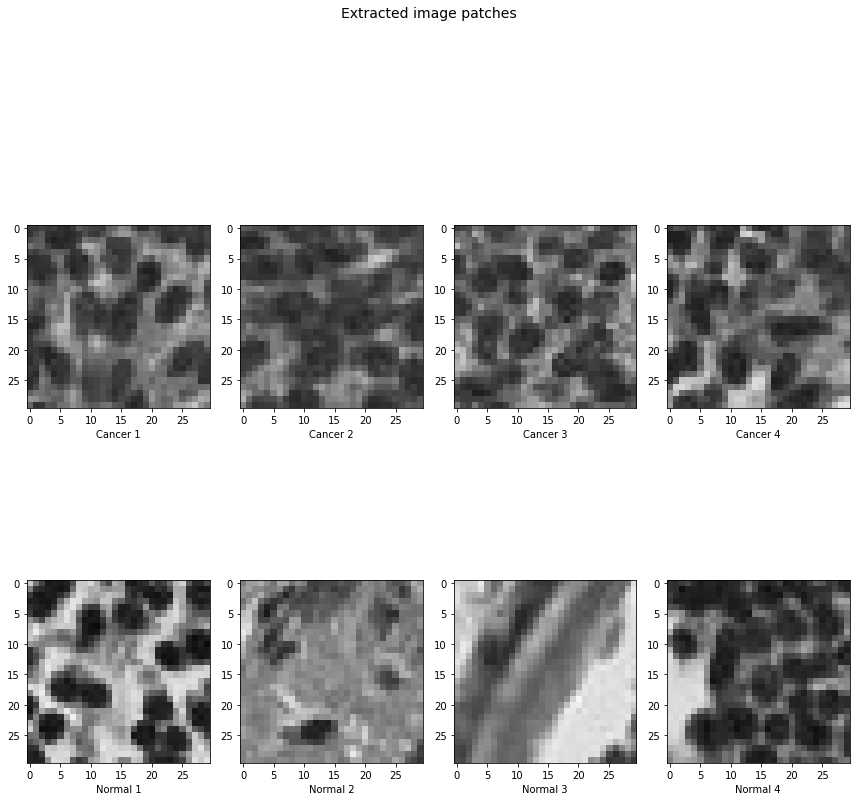

In [181]:
fig = plt.figure(figsize=(12, 12))

for i, patch in enumerate(cancer_patches):
    ax = fig.add_subplot(2, len(cancer_patches), i+1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Cancer %d' % (i + 1))

for i, patch in enumerate(normal_patches):
    ax = fig.add_subplot(2, len(cancer_patches), len(cancer_patches) + i+1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Normal %d' % (i + 1))


# display the patches and plot
fig.suptitle('Extracted image patches', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

In [182]:
xs = []
ys = []
zs = []
hs = []
for patch in (cancer_patches + normal_patches):
    glcm = greycomatrix(patch, distances=[5], angles=[0], levels=256)
    xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(greycoprops(glcm, 'correlation')[0, 0])
    zs.append(greycoprops(glcm, 'energy')[0, 0])
    hs.append(greycoprops(glcm, 'homogeneity')[0, 0])

(-0.5, 511.5, 511.5, -0.5)

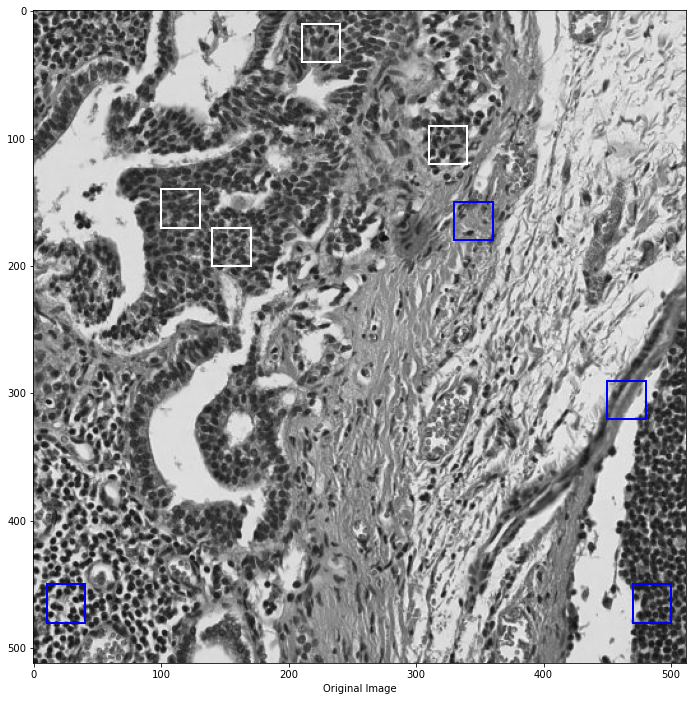

In [183]:
# create the figure
fig = plt.figure(figsize=(12, 12))


# display original image with locations of patches
ax = fig.add_subplot(1, 1, 1)
ax.imshow(image, cmap=plt.cm.gray,
          vmin=0, vmax=255)
for (y, x) in cancer_locations:
    rect = patches.Rectangle((x , y), PATCH_SIZE, PATCH_SIZE, linewidth=2,
                             edgecolor='white', facecolor='none')
    ax.add_patch(rect)
for (y, x) in normal_locations:
    rect = patches.Rectangle((x , y), PATCH_SIZE, PATCH_SIZE, linewidth=2,
                             edgecolor='blue', facecolor='none')
    ax.add_patch(rect)
ax.set_xlabel('Original Image')
ax.axis('image')


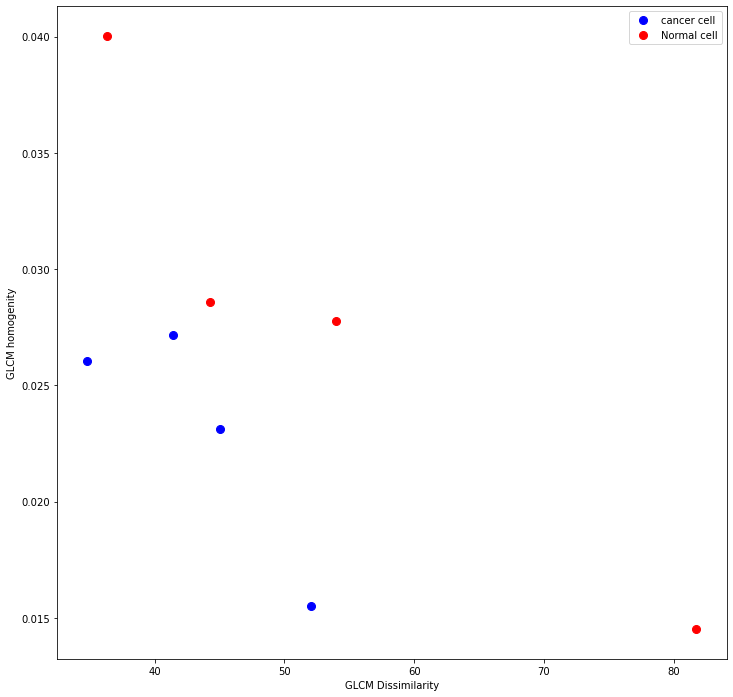

In [174]:
fig = plt.figure(figsize=(12, 12))

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(1, 1, 1)
ax.plot(xs[:len(cancer_patches)], hs[:len(cancer_patches)], 'bo', label='cancer cell', markersize=8)
ax.plot(xs[len(normal_patches):], hs[len(normal_patches):], 'ro', label='Normal cell', markersize=8)
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM homogenity')
ax.legend()

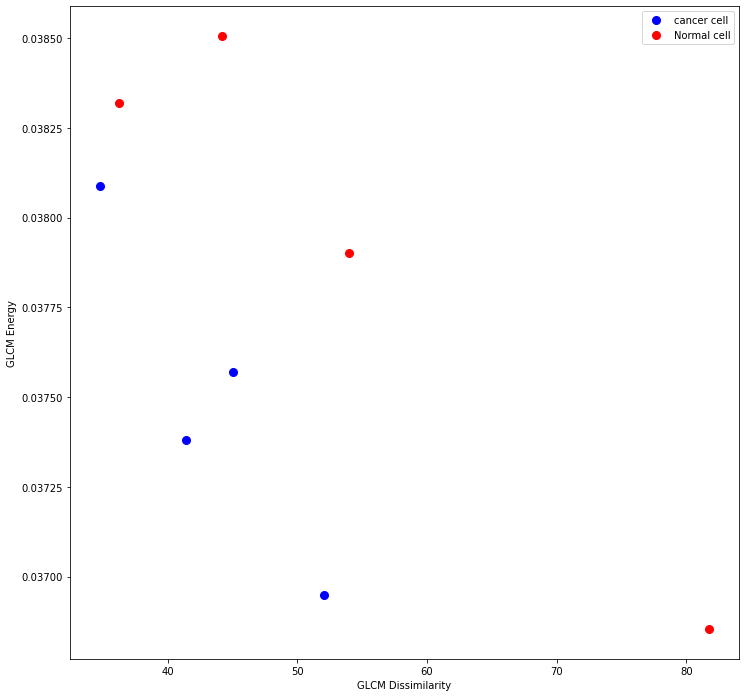

In [173]:
fig = plt.figure(figsize=(12, 12))

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(1, 1, 1)
ax.plot(xs[:len(cancer_patches)], zs[:len(cancer_patches)], 'bo', label='cancer cell', markersize=8)
ax.plot(xs[len(normal_patches):], zs[len(normal_patches):], 'ro', label='Normal cell', markersize=8)
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Energy')
ax.legend()

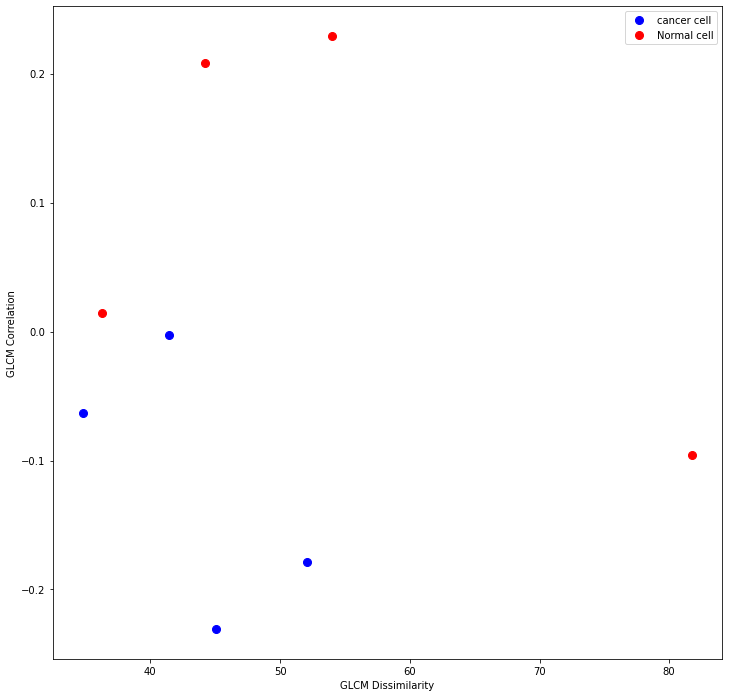

In [170]:
fig = plt.figure(figsize=(12, 12))

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(1, 1, 1)
ax.plot(xs[:len(cancer_patches)], ys[:len(cancer_patches)], 'bo', label='cancer cell', markersize=8)
ax.plot(xs[len(normal_patches):], ys[len(normal_patches):], 'ro', label='Normal cell', markersize=8)
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()

# Second attempt

In [221]:
PATCH_SIZE = 64

cancer_locations = [(10, 210), (110, 100), (170, 140), (80, 270)]
cancer_patches = []
for loc in cancer_locations:
    cancer_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

# select some patches from nuclei areas of the image
normal_locations = [(440, 10), (150, 330), (290, 440), (420, 450)]
normal_patches = []
for loc in normal_locations:
    normal_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

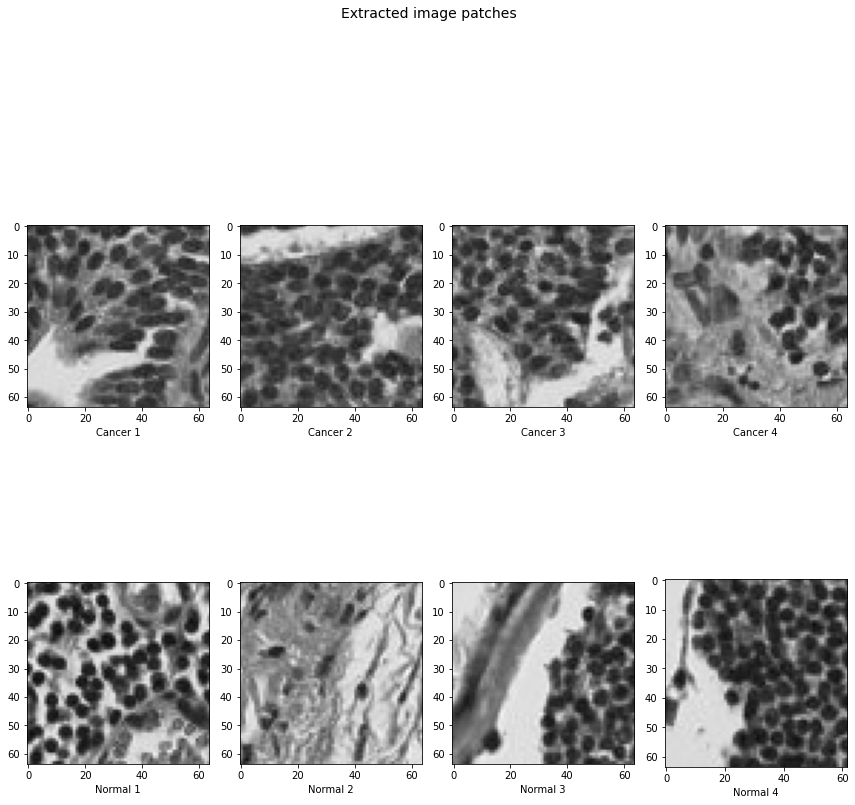

In [222]:
fig = plt.figure(figsize=(12, 12))

for i, patch in enumerate(cancer_patches):
    ax = fig.add_subplot(2, len(cancer_patches), i+1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Cancer %d' % (i + 1))

for i, patch in enumerate(normal_patches):
    ax = fig.add_subplot(2, len(cancer_patches), len(cancer_patches) + i+1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Normal %d' % (i + 1))


# display the patches and plot
fig.suptitle('Extracted image patches', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

In [223]:
xs = []
ys = []
for patch in (cancer_patches + normal_patches):
    glcm = greycomatrix(patch, distances=[5], angles=[0], levels=256)
    xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(greycoprops(glcm, 'correlation')[0, 0])

(-0.5, 539.725, 511.5, -0.5)

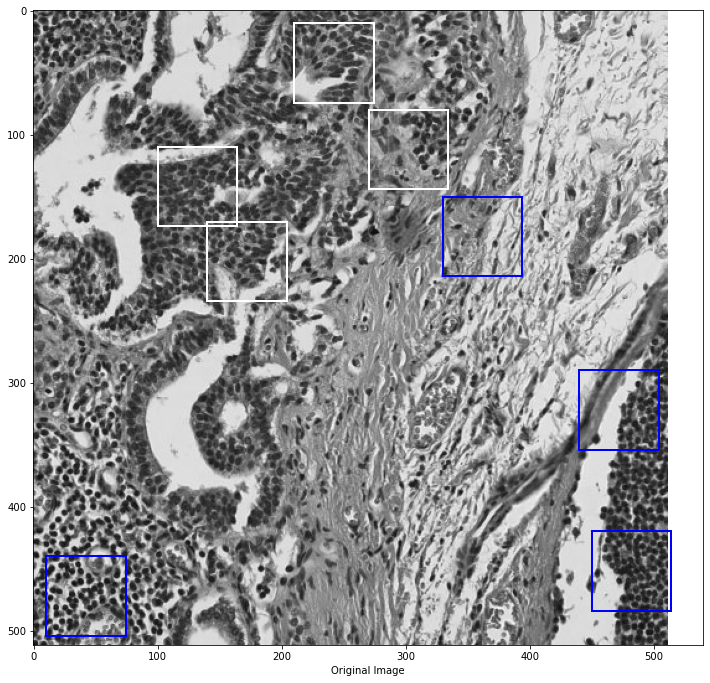

In [224]:
# create the figure
fig = plt.figure(figsize=(12, 12))


# display original image with locations of patches
ax = fig.add_subplot(1, 1, 1)
ax.imshow(image, cmap=plt.cm.gray,
          vmin=0, vmax=255)
for (y, x) in cancer_locations:
    rect = patches.Rectangle((x , y), PATCH_SIZE, PATCH_SIZE, linewidth=2,
                             edgecolor='white', facecolor='none')
    ax.add_patch(rect)
for (y, x) in normal_locations:
    rect = patches.Rectangle((x , y), PATCH_SIZE, PATCH_SIZE, linewidth=2,
                             edgecolor='blue', facecolor='none')
    ax.add_patch(rect)
ax.set_xlabel('Original Image')
ax.axis('image')


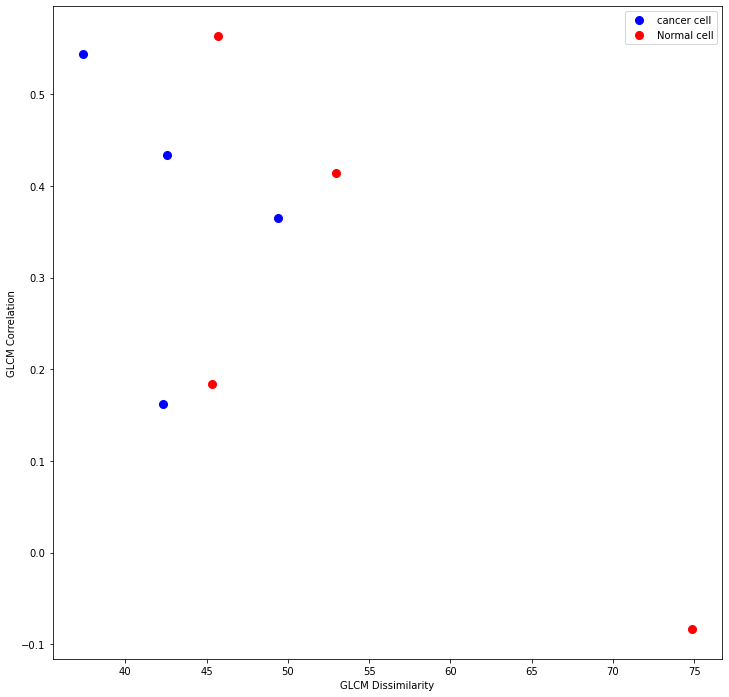

In [225]:
fig = plt.figure(figsize=(12, 12))

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(1, 1, 1)
ax.plot(xs[:len(cancer_patches)], ys[:len(cancer_patches)], 'bo', label='cancer cell', markersize=8)
ax.plot(xs[len(normal_patches):], ys[len(normal_patches):], 'ro', label='Normal cell', markersize=8)
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()

# Third attempt

In [196]:
PATCH_SIZE = 256

cancer_locations = [(0,0)]
cancer_patches = []
for loc in cancer_locations:
    cancer_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

# select some patches from nuclei areas of the image
normal_locations = [(256,0),(0,256),(256,256)]
normal_patches = []
for loc in normal_locations:
    normal_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,
                               loc[1]:loc[1] + PATCH_SIZE])

<Figure size 864x864 with 0 Axes>

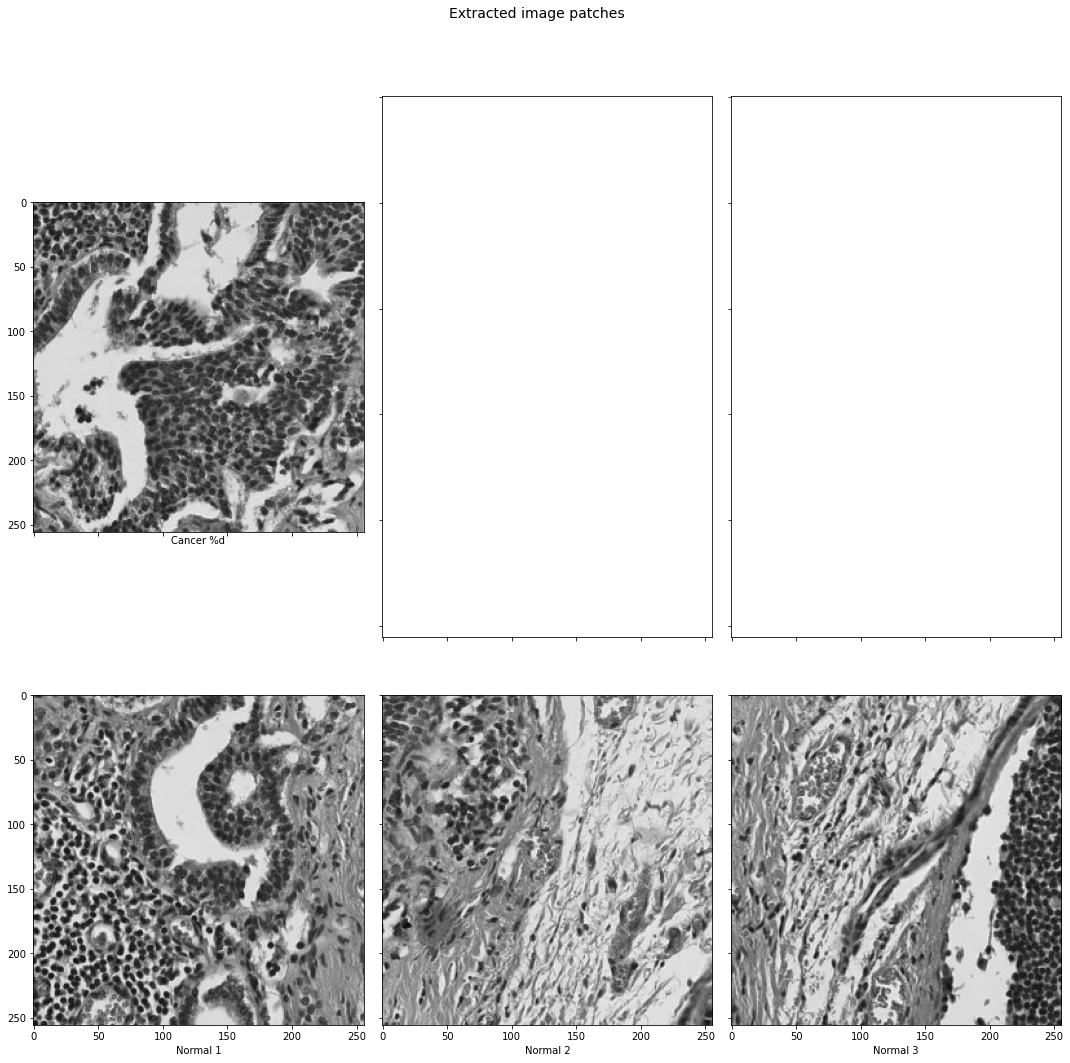

In [213]:
fig = plt.figure(figsize=(12, 12))

fig, axes = plt.subplots(2, 3, figsize=(15, 15), sharex=True, sharey=True)
ax = axes.ravel()


ax[0].imshow(cancer_patches[0],cmap=plt.cm.gray,
              vmin=0, vmax=255)
ax[0].set_xlabel('Cancer %d')

for i, patch in enumerate(normal_patches):
    
    ax[3+i].imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax[3+i].set_xlabel('Normal %d' % (i + 1))


# display the patches and plot
fig.suptitle('Extracted image patches', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

In [214]:
xs = []
ys = []
for patch in (cancer_patches + normal_patches):
    glcm = greycomatrix(patch, distances=[5], angles=[0], levels=256)
    xs.append(greycoprops(glcm, 'dissimilarity')[0, 0])
    ys.append(greycoprops(glcm, 'correlation')[0, 0])

In [218]:
print(xs)
ys

[44.25272348107572, 52.01497136454185, 43.56259337649404, 49.90855328685261]


[0.5222528648055715,
 0.256945480189661,
 0.38130170118299483,
 0.36708686202521046]

(-0.5, 537.625, 537.625, -0.5)

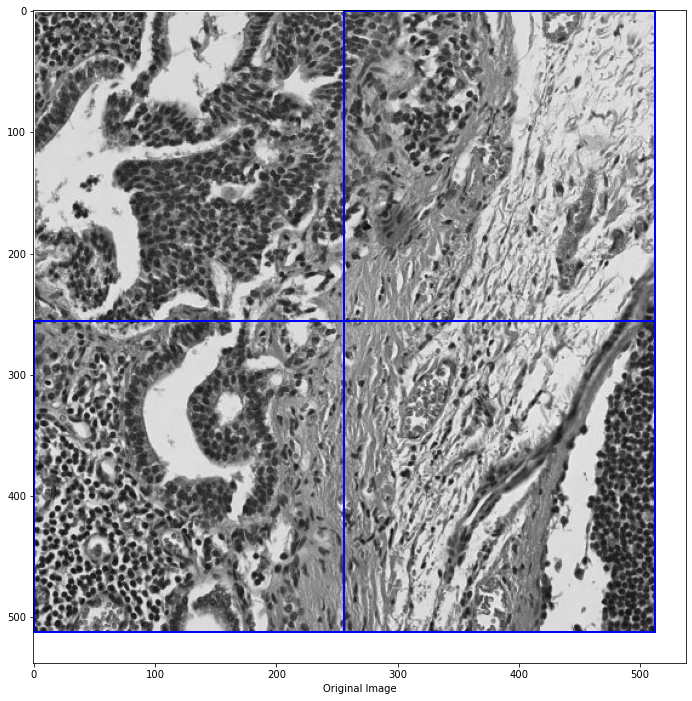

In [215]:
# create the figure
fig = plt.figure(figsize=(12, 12))


# display original image with locations of patches
ax = fig.add_subplot(1, 1, 1)
ax.imshow(image, cmap=plt.cm.gray,
          vmin=0, vmax=255)
for (y, x) in cancer_locations:
    rect = patches.Rectangle((x , y), PATCH_SIZE, PATCH_SIZE, linewidth=2,
                             edgecolor='white', facecolor='none')
    ax.add_patch(rect)
for (y, x) in normal_locations:
    rect = patches.Rectangle((x , y), PATCH_SIZE, PATCH_SIZE, linewidth=2,
                             edgecolor='blue', facecolor='none')
    ax.add_patch(rect)
ax.set_xlabel('Original Image')
ax.axis('image')


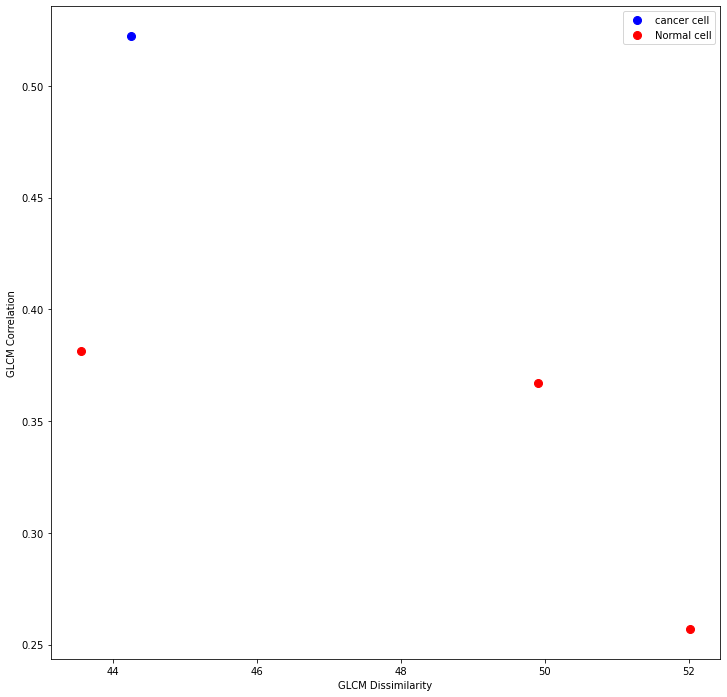

In [220]:
fig = plt.figure(figsize=(12, 12))

# for each patch, plot (dissimilarity, correlation)
ax = fig.add_subplot(1, 1, 1)
ax.plot(xs[:len(cancer_patches)], ys[:len(cancer_patches)], 'bo', label='cancer cell', markersize=8)
ax.plot(xs[len(cancer_patches):], ys[len(cancer_patches):], 'ro', label='Normal cell', markersize=8)
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()